In [1]:
%matplotlib inline
import numpy as np
import scipy
import scipy.integrate

from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD

In [2]:
nx = 449
ny = 199
dt = .2
xx, yy = np.meshgrid(np.linspace(-1, 8, nx), np.linspace(-2, 2, ny))

def cylinder_clean_data(X, fill = 0):
    
    uu = X.reshape((ny, nx, -1), order = 'F')
    uu[(xx**2+yy**2)<.5**2, :] = fill
    
    return uu.reshape((ny*nx, -1), order = 'F')

def reshaping(X):
    
    return X.reshape((ny, nx), order = 'F')

cylinder_idx = (xx**2+yy**2)<.5**2

In [3]:
X = np.load("./data/mat_UALL.npy")

In [4]:
dmd = DMD(svd_rank=-1, exact=True, sorted_eigs=False, tikhonov=0)
dmd.fit(X);

/home/tiba/share_directory/pydmd_myfix/PyDMD/pydmd/dmdbase.py:394: UserWarning: Input data matrix X has condition number 6505960.291975892. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number


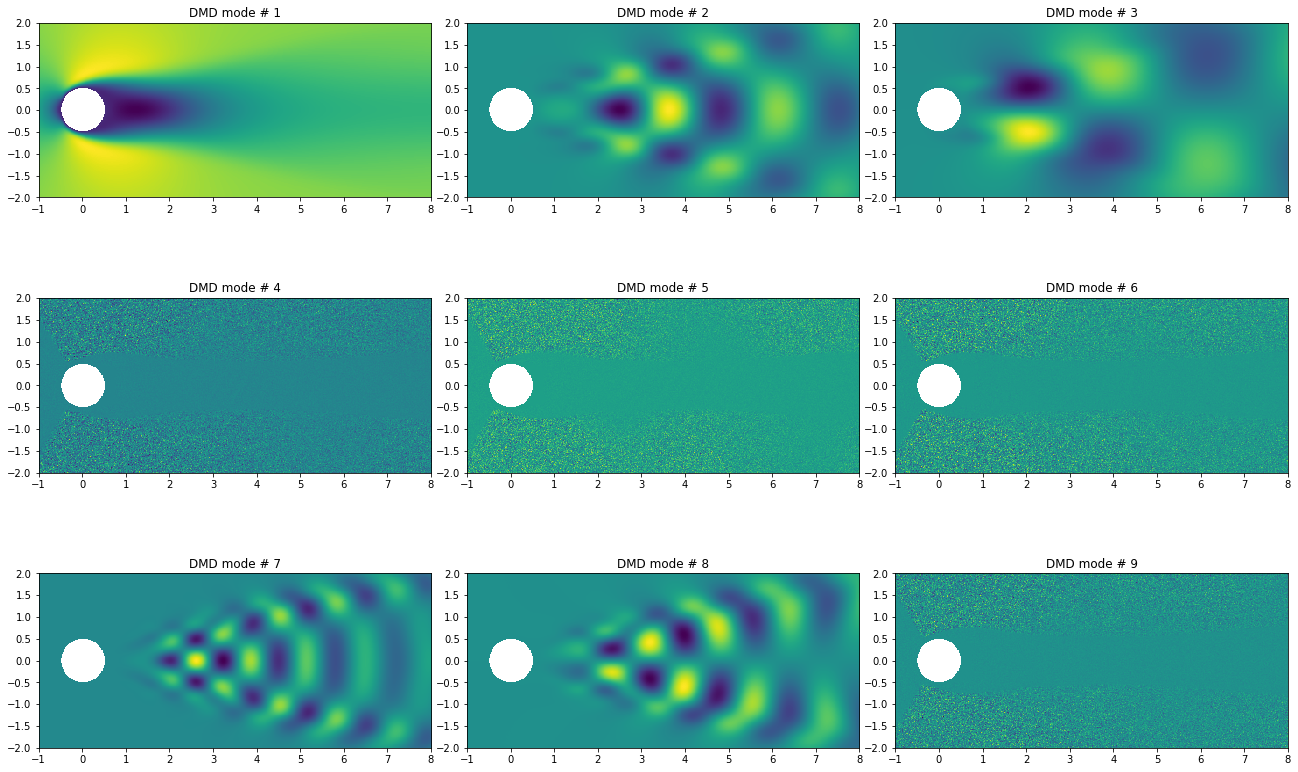

In [5]:
n_mode = np.arange(0, 18, 2)

fig, ax  = plt.subplots(3, 3, figsize = (18, 12))

for i in range(3):
    for j in range(3):
        
        to_plot = np.real(reshaping(dmd.modes[:, n_mode[((i)*3)+j]].copy()))
        to_plot[cylinder_idx] = np.nan
        im = ax[i, j].imshow(to_plot, extent=[-1, 8, -2, 2]);
        ax[i, j].set_title("DMD mode # {:d}" .format(int((n_mode[((i)*3)+j]+2)/2)));


fig.tight_layout();

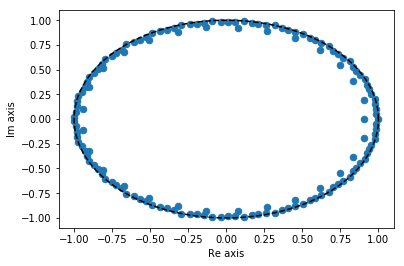

In [6]:
plt.plot(np.real(dmd.eigs), np.imag(dmd.eigs), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--");

In [7]:
dmd = DMD(svd_rank=-1, exact=True, sorted_eigs=False, tikhonov=1e-8)
dmd.fit(X);

/home/tiba/share_directory/pydmd_myfix/PyDMD/pydmd/dmdbase.py:394: UserWarning: Input data matrix X has condition number 6505960.291975892. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number


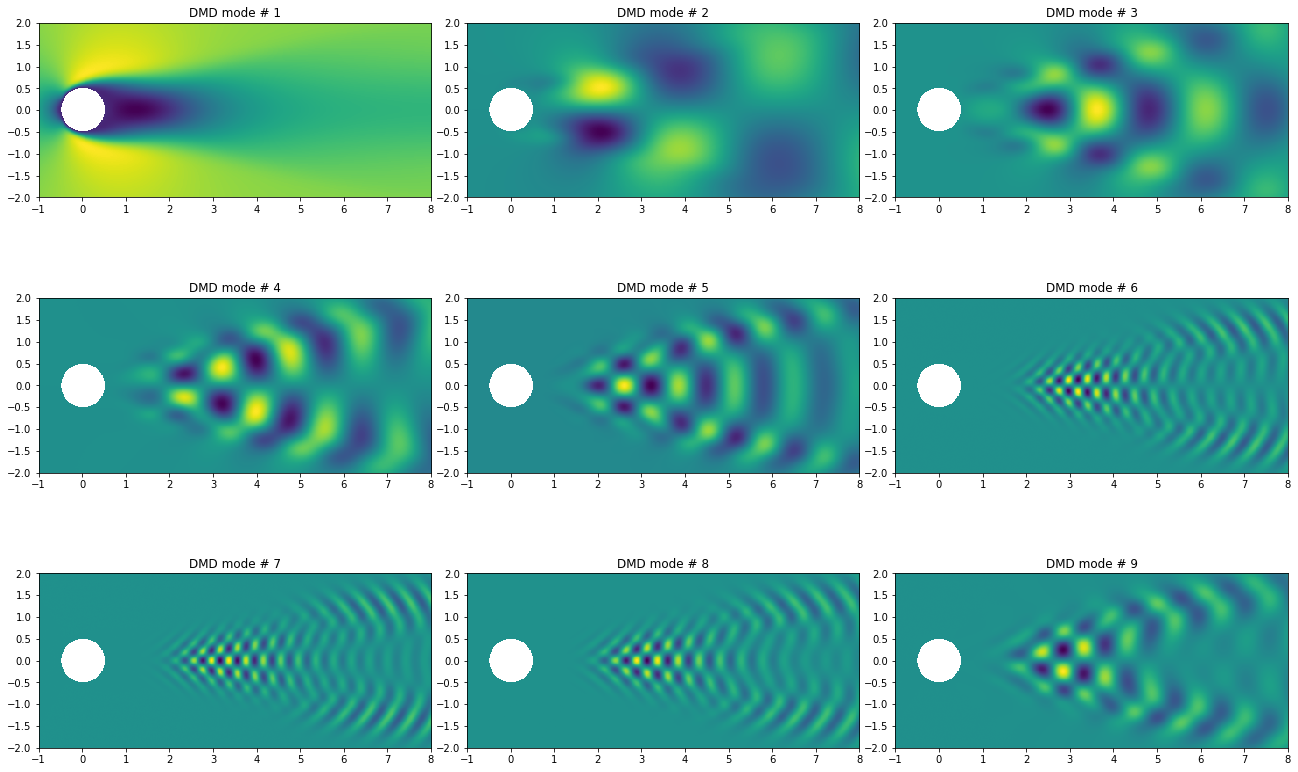

In [8]:
n_mode = np.arange(0, 18, 2)

fig, ax  = plt.subplots(3, 3, figsize = (18, 12))

for i in range(3):
    for j in range(3):
        
        to_plot = np.real(reshaping(dmd.modes[:, n_mode[((i)*3)+j]].copy()))
        to_plot[cylinder_idx] = np.nan
        im = ax[i, j].imshow(to_plot, extent=[-1, 8, -2, 2]);
        ax[i, j].set_title("DMD mode # {:d}" .format(int((n_mode[((i)*3)+j]+2)/2)));


fig.tight_layout();

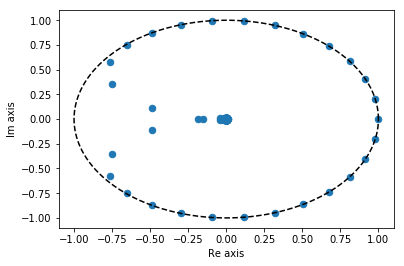

In [9]:
plt.plot(np.real(dmd.eigs), np.imag(dmd.eigs), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--");